<a href="https://colab.research.google.com/github/SPraveen69/Data_Model/blob/main/Synptoms_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the Lib**

In [54]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### **Uploading the Dataset**

In [55]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/BDX Dataset/MedicalEdited.xlsx'

# Load the CSV file into a DataFrame
data = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Preprocessing**

In [56]:
# # Set the path to the Excel file
# file_path = '/content/sample_data/medical center deitailes.xlsx'

# # Read the Excel file
# data = pd.read_excel(file_path)

In [57]:
data.shape

(562, 49)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         562 non-null    object        
 1   EPF No                       532 non-null    float64       
 2   Time                         0 non-null      float64       
 3   Employee No                  463 non-null    float64       
 4   Name With Initials           562 non-null    object        
 5   Calling Name                 562 non-null    object        
 6   Department                   561 non-null    object        
 7   Roster                       463 non-null    object        
 8   Shift                        476 non-null    object        
 9   Symptoms                     538 non-null    object        
 10  Reporting Type               548 non-null    object        
 11  Treatments                   27 non-null     

In [59]:
# replace unwanted values with nan
# data = data.replace('#DIV/0!', np.nan)

# returns the total number of missing values for each column
data.isnull().sum()

,0
Date,0
EPF No,30
Time,562
Employee No,99
Name With Initials,0
Calling Name,0
Department,1
Roster,99
Shift,86
Symptoms,24


In [60]:
data

,Date,EPF No,Time,Employee No,Name With Initials,Calling Name,Department,Roster,Shift,Symptoms,...,Eno,Complain,Communicable Diseases,Hospital Stay/ Home Stay,Return to work Date,Plant,Contact Number,ID,Item Type,Path
0,26/06/2024 11:18,26813.0,NaN,1008008.0,Y.M.W.G.Mallika,Mallika,Manufacturing,Team G - Shift B,B,body Pain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
1,26/06/2024 11:18,NaN,NaN,NaN,Sujeewa,Sujeewa,Third party,NaN,NaN,Back Pain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
2,26/06/2024 14:08,28616.0,NaN,1045160.0,W.D.ASHOKAMALA,Dilhani,Manufacturing,Team 11 - Shift A,A,Eye Pain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10002,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
3,26/06/2024 14:09,29057.0,NaN,1084133.0,H.M.C.D.Herath,Chamila,Manufacturing,Team 23 - Shift A,A,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
4,26/06/2024 14:09,23185.0,NaN,98753.0,R.Jelastina,Jelastina,Manufacturing,Team 09 - Shift A,A,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10004,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,23/07/2024 18:10,28822.0,NaN,1051311.0,A.A.R.ATHUGALA,Ayesha,Warehouse,Team 02 - Shift A,A,Headache,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10557,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
558,23/07/2024 18:11,29481.0,NaN,NaN,Nisansala,Nisansala,Manufacturing,NaN,A,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10558,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
559,23/07/2024 19:30,24912.0,NaN,990872.0,S.Arththana,Arththana,Manufacturing,Team 19 - Shift A,A,Gastric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10559,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
560,23/07/2024 20:10,24494.0,NaN,985956.0,P.P.R.N.De Silva Gunawardhana,Nuwan,Manufacturing,Team G - Shift G,G,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10560,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...


In [61]:
#retrieve all columns of data
data.columns

Index(['Date', 'EPF No', 'Time', 'Employee No', 'Name With Initials',
       'Calling Name', 'Department', 'Roster', 'Shift', 'Symptoms',
       'Reporting Type', 'Treatments', 'Paracetamol', 'Vitamin B', 'Vitamin C',
       ' Digene Tablet', 'Crape Bandage', 'Samahan', 'Jeewani',
       'Bed Rest In time', 'Bed Rest Out time', 'Entered By', 'Hospital Visit',
       'Hospital Name', 'Date of Visit', 'Visited Nurse ', 'Remark', 'Reason',
       'Brandix Employee/Contractor', 'Created', 'Created By', 'Modified By',
       'Modified', 'Hospital Refer/ Sent Home', 'BP ', 'Pulse ', 'Temperature',
       'SpO2', 'Patient Type', 'Eno', 'Complain', 'Communicable Diseases',
       'Hospital Stay/ Home Stay', 'Return to work Date', 'Plant',
       'Contact Number', 'ID', 'Item Type', 'Path'],
      dtype='object')

In [62]:
# drop unwanted columns in data
columns = ['Date','EPF No','Department','Shift','Symptoms']
data = data[columns]

In [63]:
#remove all the null row values
data = data.dropna()
data

,Date,EPF No,Department,Shift,Symptoms
0,26/06/2024 11:18,26813.0,Manufacturing,B,body Pain
2,26/06/2024 14:08,28616.0,Manufacturing,A,Eye Pain
3,26/06/2024 14:09,29057.0,Manufacturing,A,Cold
4,26/06/2024 14:09,23185.0,Manufacturing,A,Cold
5,26/06/2024 14:10,23887.0,Manufacturing,A,Cold
...,...,...,...,...,...
557,23/07/2024 18:10,28822.0,Warehouse,A,Headache
558,23/07/2024 18:11,29481.0,Manufacturing,A,Cold
559,23/07/2024 19:30,24912.0,Manufacturing,A,Gastric
560,23/07/2024 20:10,24494.0,Manufacturing,G,Cold


In [67]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M', errors='coerce').dt.date

In [69]:
symptom_counts = data.groupby(['Date', 'Department']).size().reset_index(name='Symptom_Count')
symptom_counts


,Date,Department,Symptom_Count
0,2024-06-26,Cutting,1
1,2024-06-26,Direct,1
2,2024-06-26,Facility Management,1
3,2024-06-26,Finishing,4
4,2024-06-26,Manufacturing,8
...,...,...,...
133,2024-07-23,Industrial Engineering,1
134,2024-07-23,Manufacturing,15
135,2024-07-23,Quality Assurance,1
136,2024-07-23,Training School,2


In [70]:
symptom_counts_pivot = symptom_counts.pivot(index='Date', columns='Department', values='Symptom_Count').fillna(0)
symptom_counts_pivot

Department,Central Inspection Facility,Cutting,Direct,Facility Management,Finishing,Finishing & Packing,Good Transport,HR,Indirect,Industrial Engineering,...,Operations,Pilot Zone,Planning,Quality Assurance,RM Inspection,Technical,Training School,Training Scool,Warehouse,Works HR
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-26,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2024-06-27,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2024-06-28,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2024-06-29,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-07-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-07-02,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
2024-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2024-07-04,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
2024-07-05,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [105]:
departments = data['Department'].unique()
departments

array(['Manufacturing', 'Finishing', 'Direct', 'Cutting', 'Operations',
       'Warehouse', 'Facility Management', 'Planning', 'Pilot Zone',
       'Machine Maintenance', 'Indirect', 'Technical',
       'Finishing & Packing', 'Quality Assurance', 'Works HR',
       'Medical Centre', 'Industrial Engineering',
       'Central Inspection Facility', 'Training School', 'Good Transport',
       'HR', 'RM Inspection', 'Training Scool', 'Manufaturing'],
      dtype=object)

In [120]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model for the 'Finance' department
finance_data = symptom_counts_pivot['Manufacturing'].astype(int)

# Fit the model
model = ARIMA(finance_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the next 5 days
forecast = model_fit.forecast(steps=5)
forecast = forecast.round()

# Display the forecast
print("Finance Department - Predicted Symptoms Count for 08-15 to 08-19:")
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Finance Department - Predicted Symptoms Count for 08-15 to 08-19:
23     7.0
24    13.0
25    11.0
26    11.0
27    10.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [113]:
# Create an empty DataFrame to store forecast results
forecast_results = pd.DataFrame()

# Forecast for each department
for dept in departments:
    # Filter data for the current department
    dept_data = symptom_counts_pivot[dept].astype(int)

    # Fit the ARIMA model
    model = ARIMA(dept_data, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast for the next 5 days
    forecast = model_fit.forecast(steps=5)
    forecast = forecast.round()

    # Create a DataFrame for the forecast
    future_dates = pd.date_range(start='2024-08-15', periods=5, freq='D')
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Department': dept,
        'Forecasted Symptoms Count': forecast
    })

    # Append forecast to results
    forecast_results = pd.concat([forecast_results, forecast_df], ignore_index=True)

# Display the forecast results
forecast_results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,Date,Department,Forecasted Symptoms Count
0,2024-08-15,Manufacturing,7.0
1,2024-08-16,Manufacturing,13.0
2,2024-08-17,Manufacturing,11.0
3,2024-08-18,Manufacturing,11.0
4,2024-08-19,Manufacturing,10.0
...,...,...,...
115,2024-08-15,Manufaturing,-0.0
116,2024-08-16,Manufaturing,-0.0
117,2024-08-17,Manufaturing,-0.0
118,2024-08-18,Manufaturing,-0.0


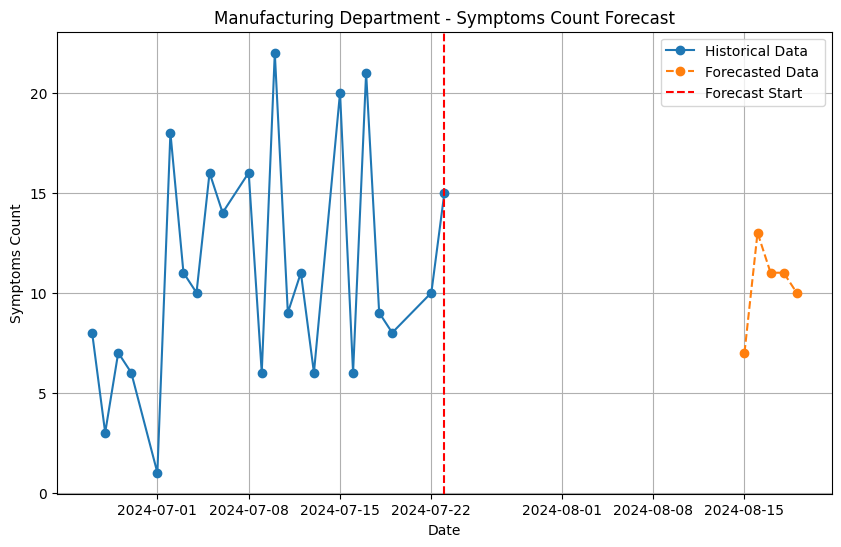

Manufacturing Department - Predicted Symptoms Count for 08-15 to 08-19:
23     7.0
24    13.0
25    11.0
26    11.0
27    10.0
Name: predicted_mean, dtype: float64


In [121]:
dept_data = pd.DataFrame(dept_data)
dept_data.reset_index(inplace=True)
dept_data.set_index('Date', inplace=True)
dept_data.index = pd.to_datetime(dept_data.index)

forecast_series = pd.Series(forecast, index=future_dates, name='Symptoms Count')
# Combine historical data and forecast data
combined = pd.concat([finance_data, forecast_series])

plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(finance_data.index, finance_data, label='Historical Data', marker='o')

# Plot forecast data
plt.plot(forecast_series.index, forecast, label='Forecasted Data', marker='o', linestyle='--')

# Add a vertical line to indicate the start of forecast
plt.axvline(x=finance_data.index[-1], color='r', linestyle='--', label='Forecast Start')

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.title('Manufacturing Department - Symptoms Count Forecast')
plt.xlabel('Date')
plt.ylabel('Symptoms Count')
plt.grid(True)
plt.show()

# Display the forecast
print("Manufacturing Department - Predicted Symptoms Count for 08-15 to 08-19:")
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

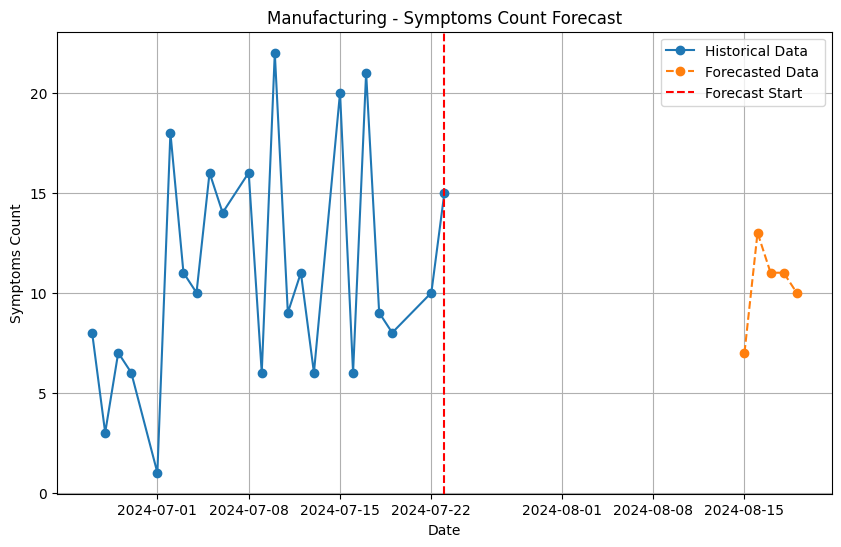

Manufacturing - Predicted Symptoms Count for 08-15 to 08-19:
23     7.0
24    13.0
25    11.0
26    11.0
27    10.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

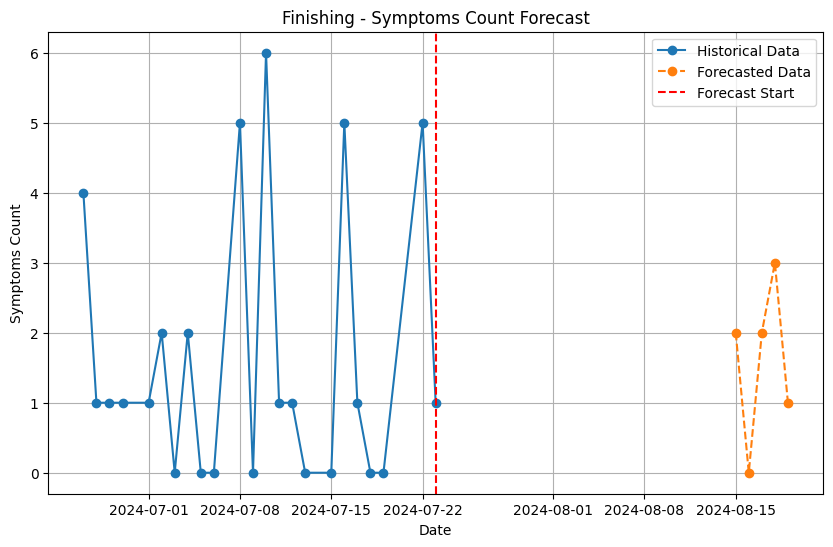

Finishing - Predicted Symptoms Count for 08-15 to 08-19:
23    2.0
24    0.0
25    2.0
26    3.0
27    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

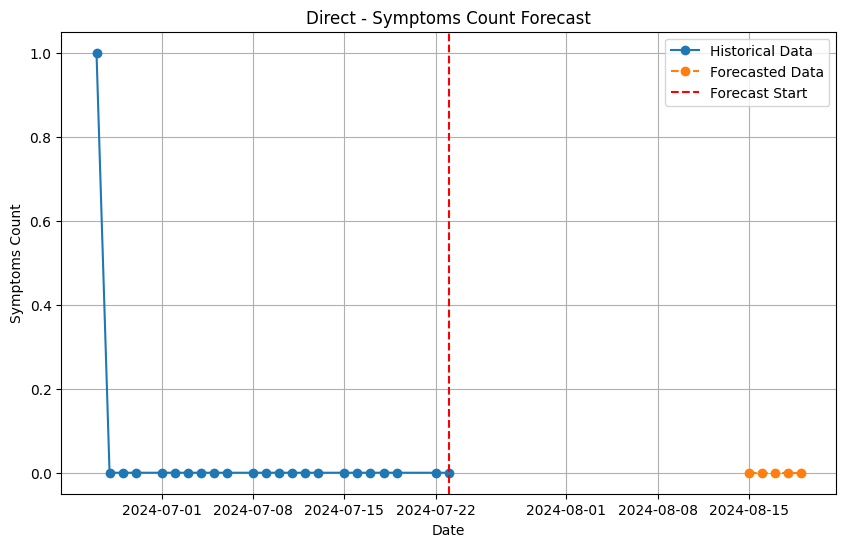

Direct - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

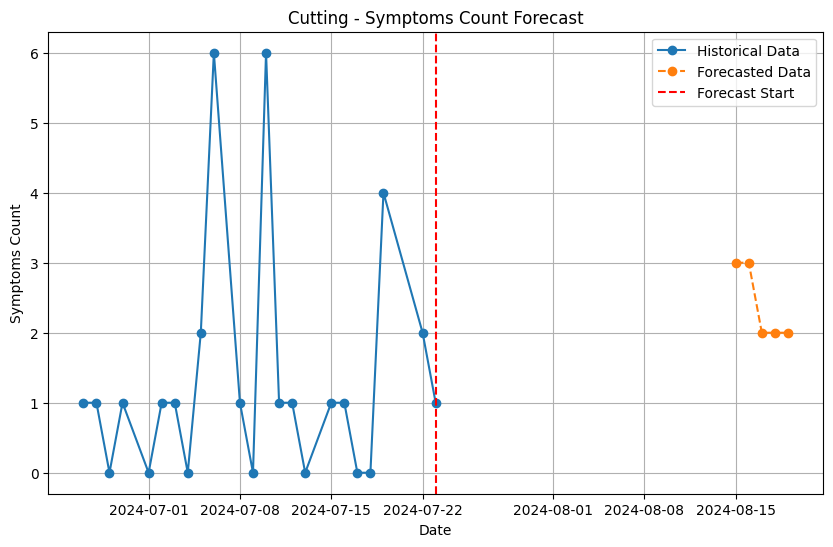

Cutting - Predicted Symptoms Count for 08-15 to 08-19:
23    3.0
24    3.0
25    2.0
26    2.0
27    2.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

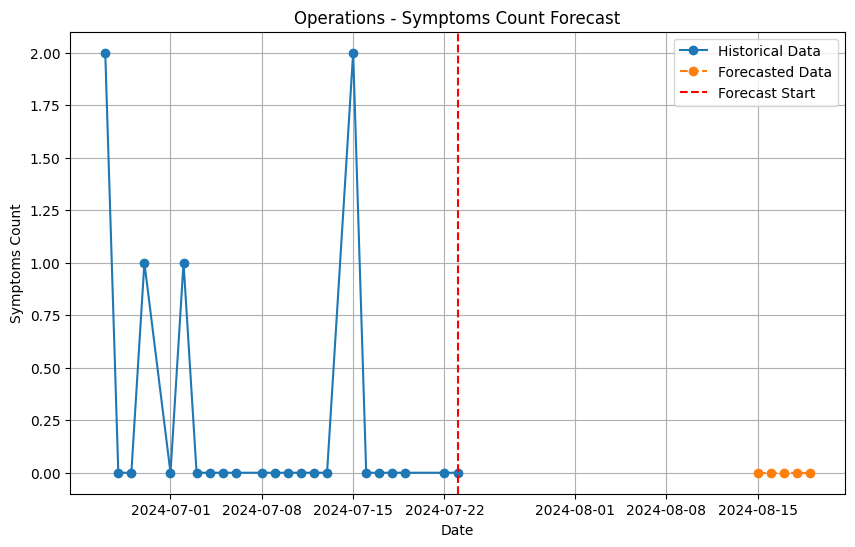

Operations - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

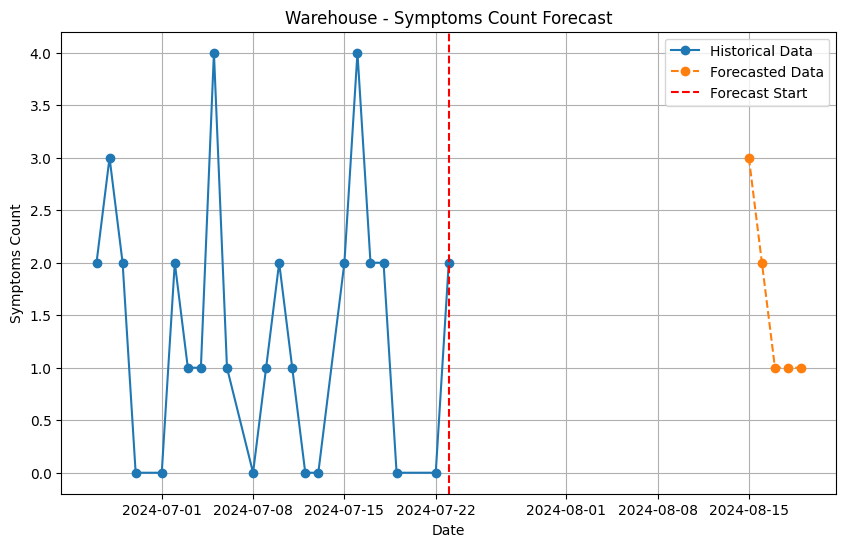

Warehouse - Predicted Symptoms Count for 08-15 to 08-19:
23    3.0
24    2.0
25    1.0
26    1.0
27    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

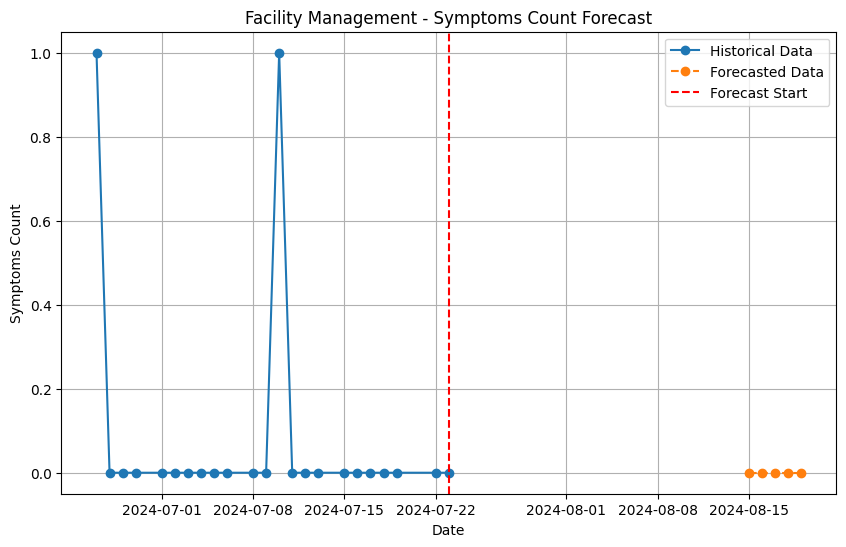

Facility Management - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

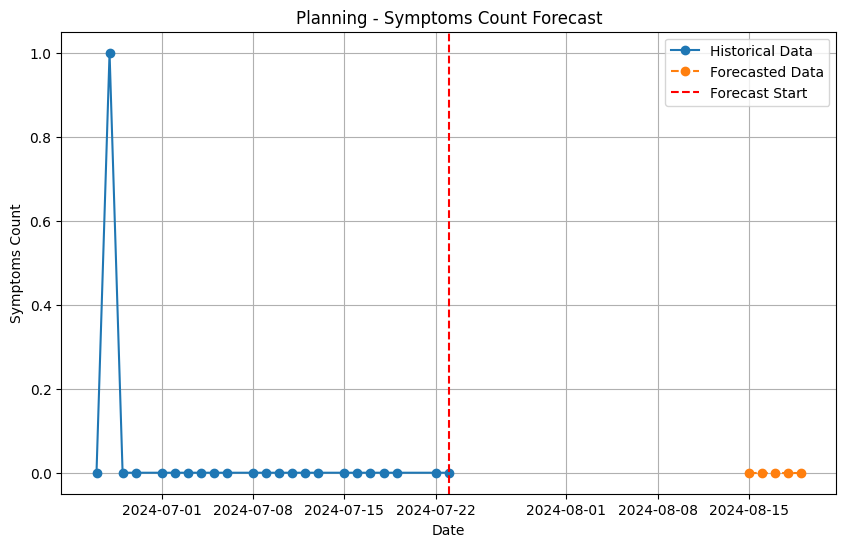

Planning - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

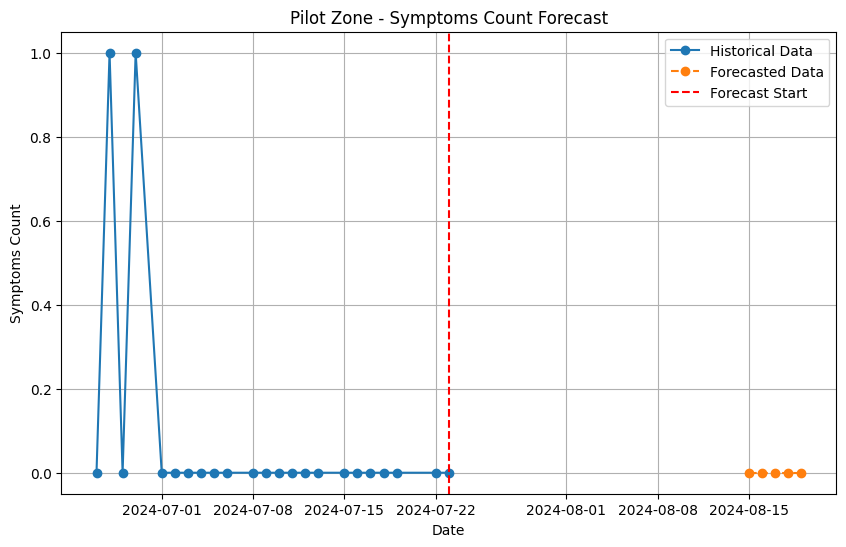

Pilot Zone - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

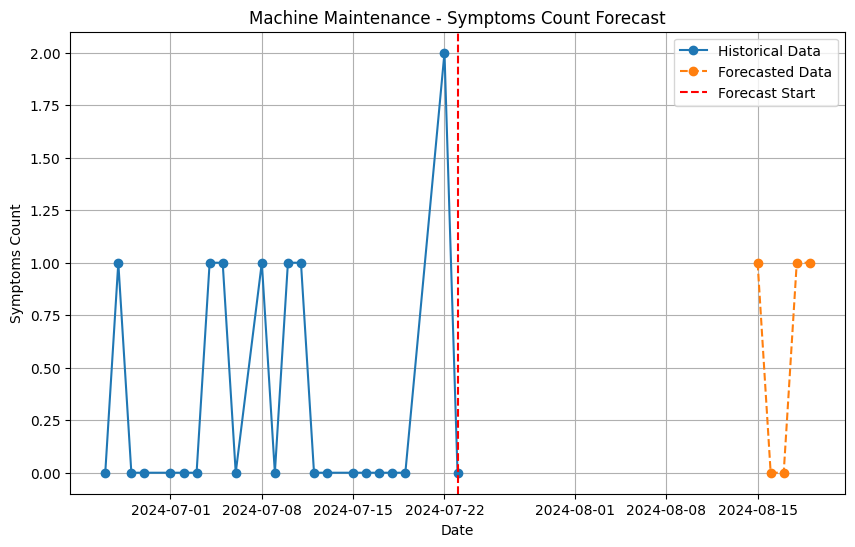

Machine Maintenance - Predicted Symptoms Count for 08-15 to 08-19:
23    1.0
24    0.0
25    0.0
26    1.0
27    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

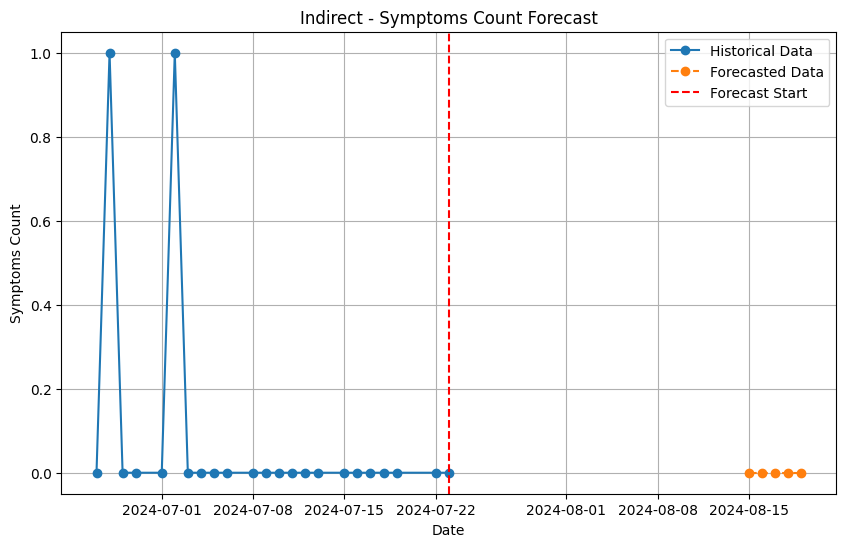

Indirect - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

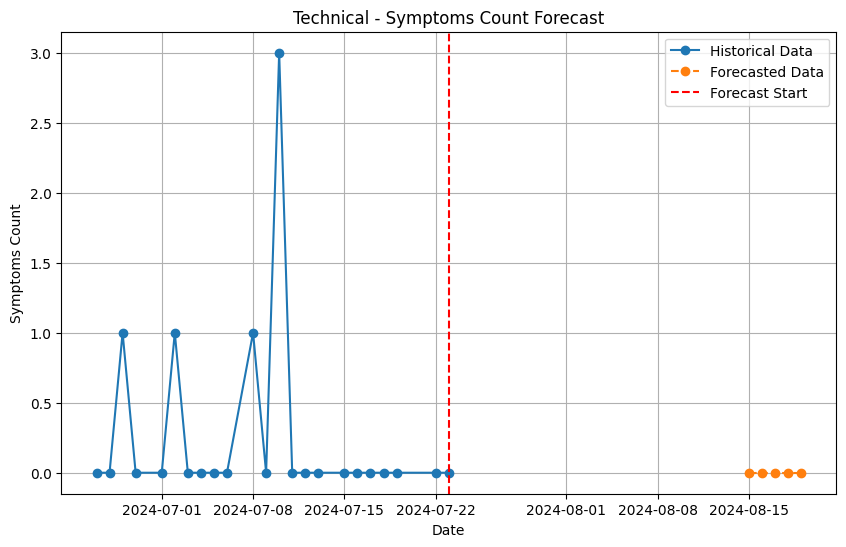

Technical - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

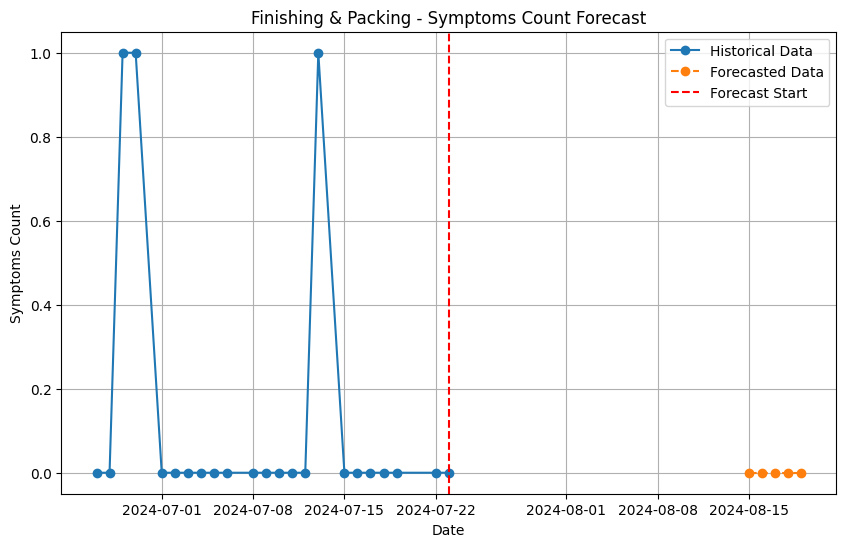

Finishing & Packing - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

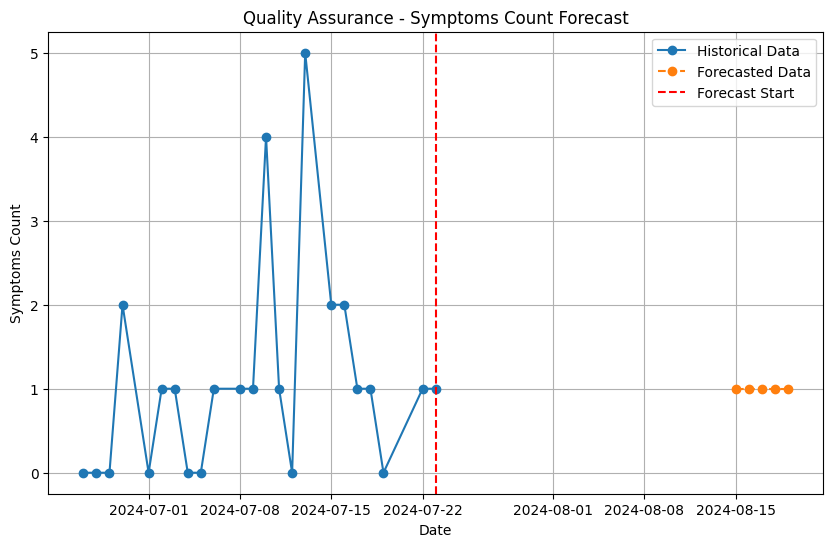

Quality Assurance - Predicted Symptoms Count for 08-15 to 08-19:
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

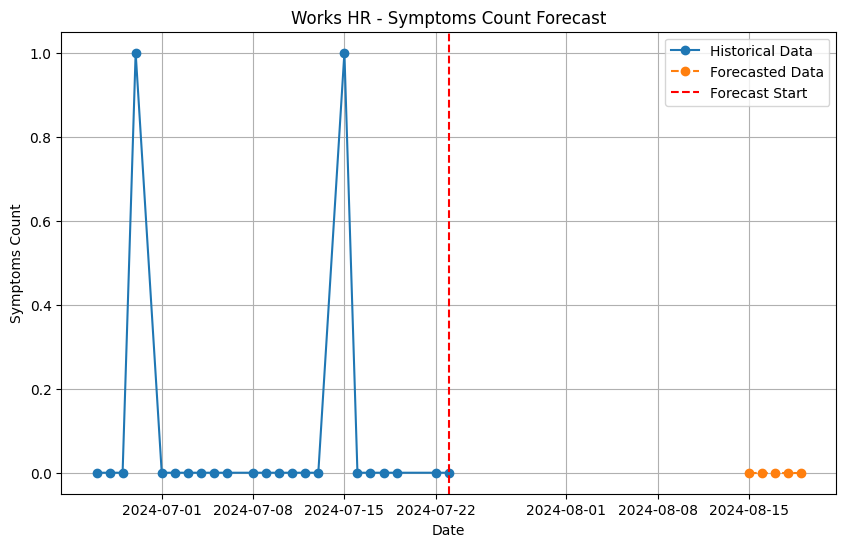

Works HR - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

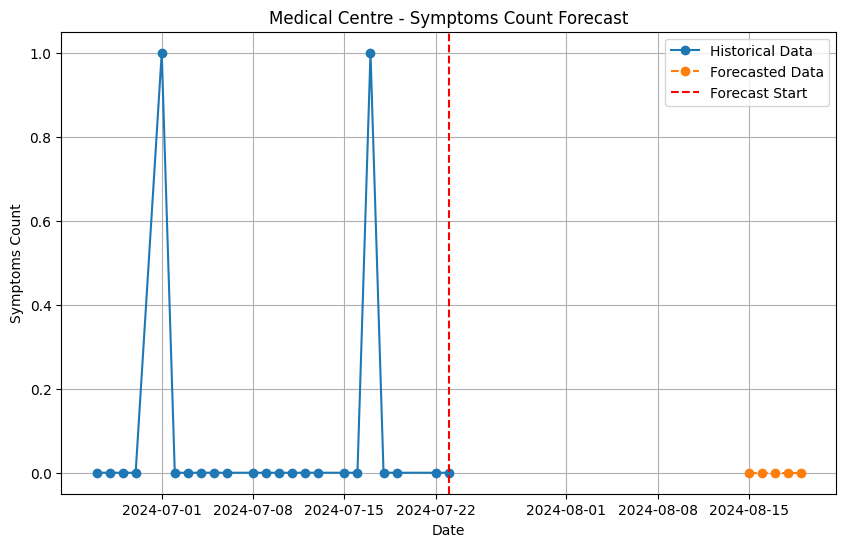

Medical Centre - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

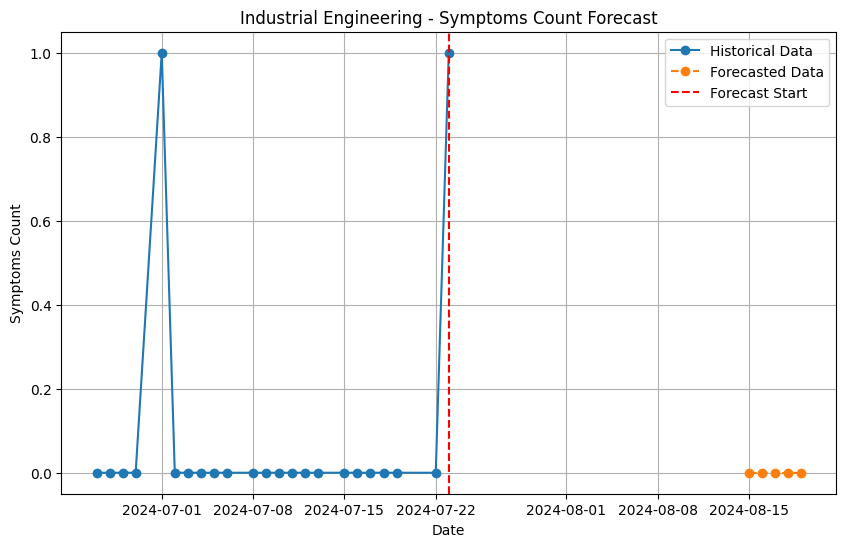

Industrial Engineering - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

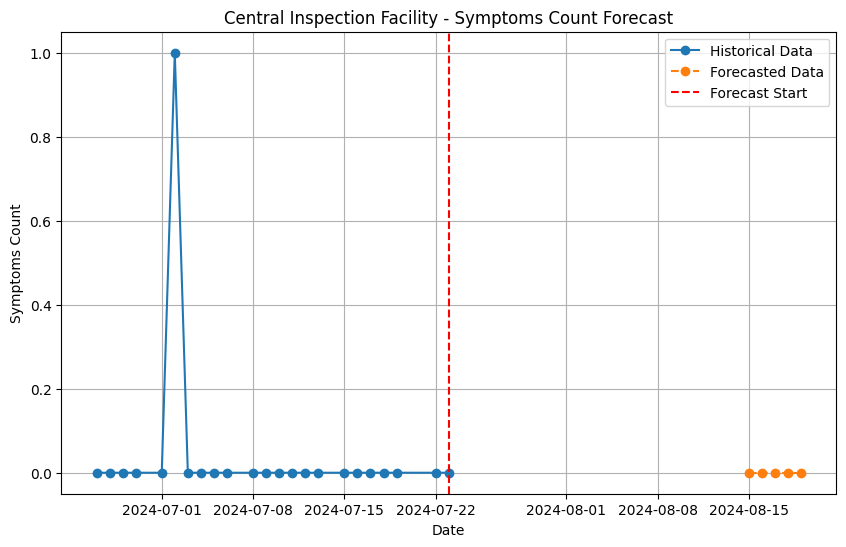

Central Inspection Facility - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

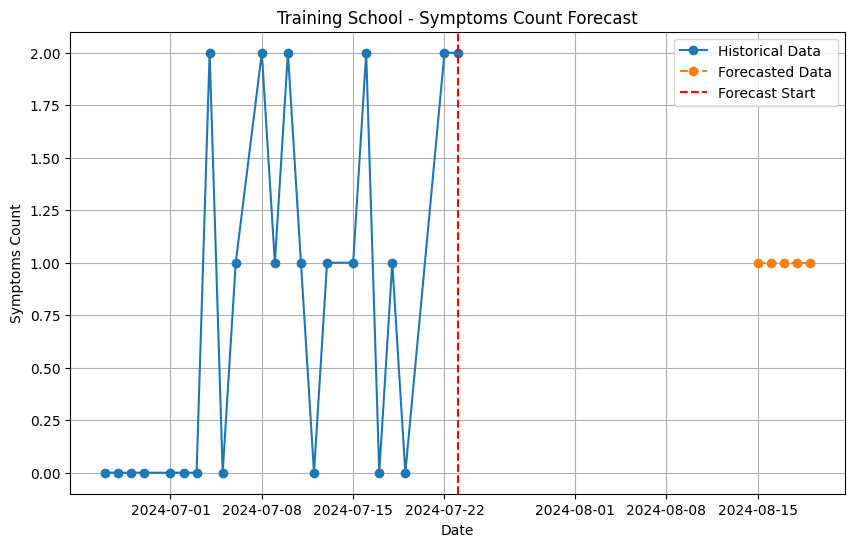

Training School - Predicted Symptoms Count for 08-15 to 08-19:
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

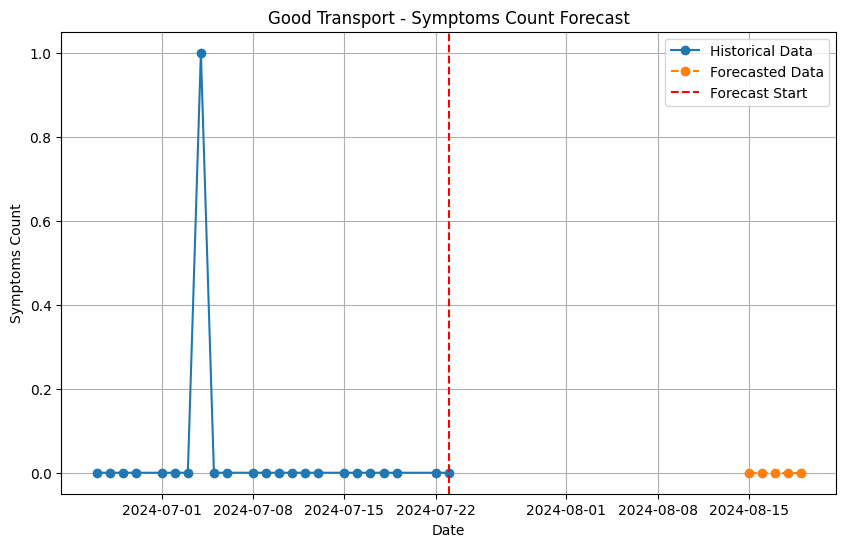

Good Transport - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

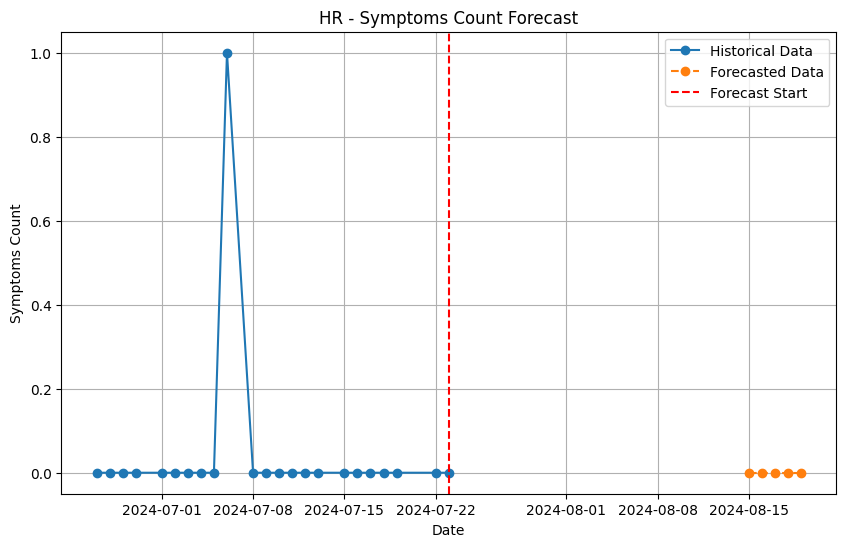

HR - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

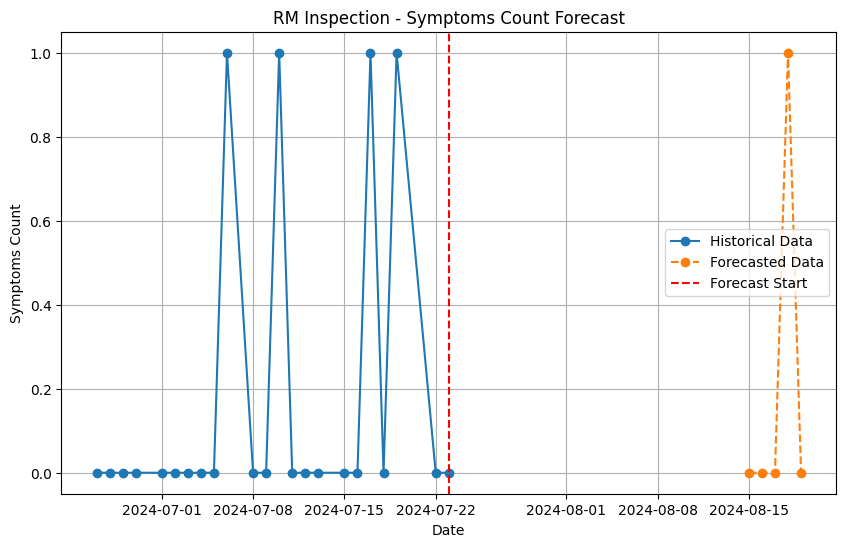

RM Inspection - Predicted Symptoms Count for 08-15 to 08-19:
23    0.0
24    0.0
25    0.0
26    1.0
27    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

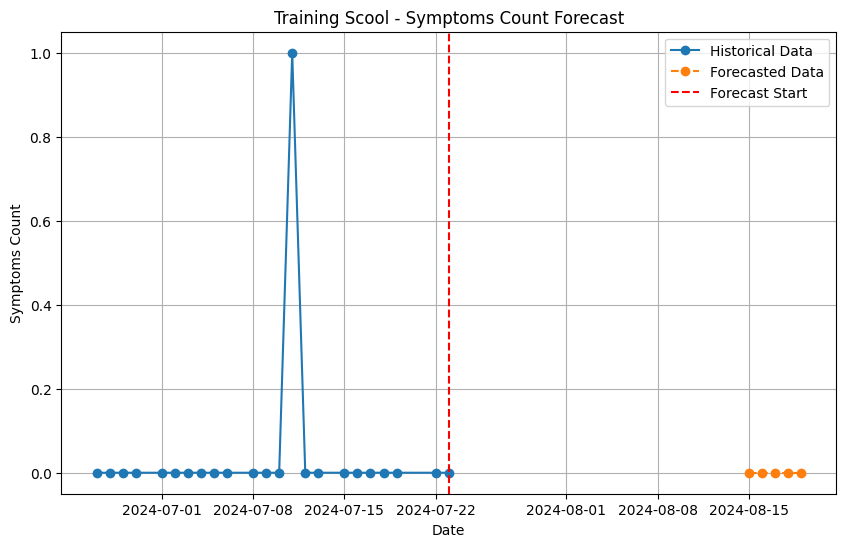

Training Scool - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

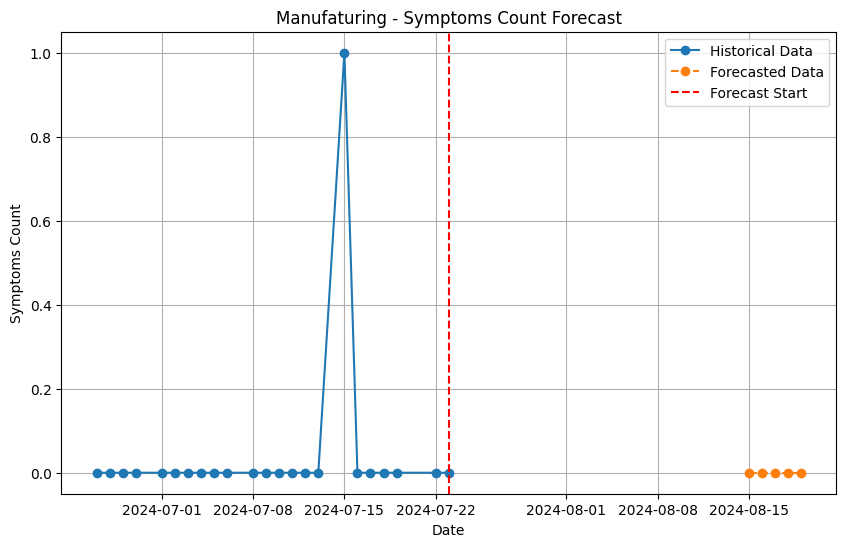

Manufaturing - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


In [130]:
# Forecast for each department
for dept in departments:
    # Filter data for the current department
    dept_data = symptom_counts_pivot[dept].astype(int)

    # Fit the ARIMA model
    model = ARIMA(dept_data, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast for the next 5 days
    forecast = model_fit.forecast(steps=5).round()

    # Create a DataFrame for the forecast
    future_dates = pd.date_range(start='2024-08-15', periods=5, freq='D')
    forecast_series = pd.Series(forecast, index=future_dates, name='Forecasted Symptoms Count')

    dept_data = pd.DataFrame(dept_data)
    dept_data.reset_index(inplace=True)
    dept_data.set_index('Date', inplace=True)
    dept_data.index = pd.to_datetime(dept_data.index)
    forecast_series = pd.Series(forecast, index=future_dates, name='Symptoms Count')
    # Combine historical data with forecast data
    combined = pd.concat([dept_data, forecast_series])

    # Plot
    plt.figure(figsize=(10, 6))

    # Plot historical data
    plt.plot(dept_data.index, dept_data, label='Historical Data', marker='o')

    # Plot forecast data
    plt.plot(forecast_series.index, forecast, label='Forecasted Data', marker='o', linestyle='--')

    # Add a vertical line to indicate the start of forecast
    plt.axvline(x=dept_data.index[-1], color='r', linestyle='--', label='Forecast Start')

    # Format x-axis as dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.legend()
    plt.title(f'{dept} - Symptoms Count Forecast')
    plt.xlabel('Date')
    plt.ylabel('Symptoms Count')
    plt.grid(True)

    # Show plot in notebook environment
    plt.show()

    # Save the plot as an image file
    plt.savefig(f'{dept}_Symptoms_Forecast.png')
    plt.close()

    # Display the forecast
    print(f"{dept} - Predicted Symptoms Count for 08-15 to 08-19:")
    print(forecast)



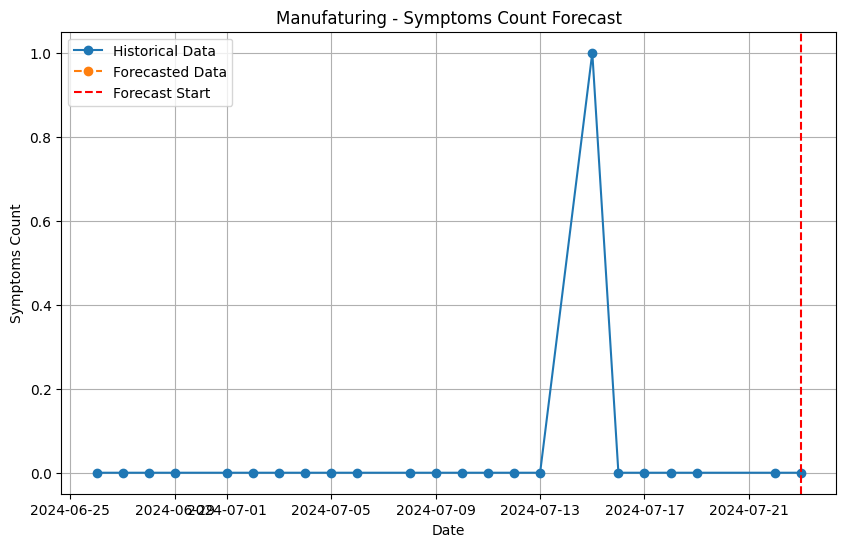

Manufaturing - Predicted Symptoms Count for 08-15 to 08-19:
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
Name: predicted_mean, dtype: float64


In [125]:
    # Combine historical data with forecast data
combined = pd.concat([dept_data, forecast_series])

    # Plot
plt.figure(figsize=(10, 6))

    # Plot historical data
plt.plot(dept_data.index, dept_data, label='Historical Data', marker='o')

    # Plot forecast data
plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', marker='o', linestyle='--')

    # Add a vertical line to indicate the start of forecast
plt.axvline(x=dept_data.index[-1], color='r', linestyle='--', label='Forecast Start')

    # Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.title(f'{dept} - Symptoms Count Forecast')
plt.xlabel('Date')
plt.ylabel('Symptoms Count')
plt.grid(True)

    # Show plot in notebook environment
plt.show()

    # Save the plot as an image file
plt.savefig(f'{dept}_Symptoms_Forecast.png')
plt.close()

    # Display the forecast
print(f"{dept} - Predicted Symptoms Count for 08-15 to 08-19:")
print(forecast)